In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data Preparation
First we ingested the Market Check Used Car Inventory data file containing used cars accross United States (~6.7 million instances with 38 features
Then we did initial data wraggling in SQLite and Alteryx (Removed columns with null values, single values, huge descriptive text values. Also instances with null values and 4 digit zipcodes

In [2]:
#df = pd.read_csv('Desktop/GT/car_data_clean.csv')
df = pd.read_csv(r'C:\Users\yexin\Desktop\KBB\car_data_clean_final.csv')

In [3]:
df.head()

,Unnamed: 0,id,vin_ss,price_fs,miles_fs,stock_no_ss,year_is,make_ss,model_ss,trim_ss,...,Rank,County,State short,Per Capita income,Median Household income,Median Family income,Population,Number of households,State full,Regions
0,31784,02640686-02b6-4043-93a5-0fb40f39561c,1C6RR6GG8HS722830,27000,39208,12863P,2017,Ram,1500,SLT,...,1848.000,Ouachita,LA,"$21,917.00","$38,955.00","$50,992.00",154641.000,57551.000,Louisiana,South
1,31785,026408e7-6f0a-4239-8561-e6b80478cf4d,3VWLL7AJXDM382770,8690,131110,341530,2013,Volkswagen,Jetta,TDI,...,820.000,Stearns,MN,"$26,065.00","$54,551.00","$69,196.00",151053.000,56737.000,Minnesota,MidWest
2,31786,026413ef-5427-40c6-a8bd-a5994dc53a90,1C6RR7GT9GS270792,26990,52415,AF3166A,2016,Ram,1500,SLT,...,1067.000,Jasper,IA,"$24,905.00","$50,513.00","$63,418.00",36710.000,14826.000,Iowa,MidWest
3,31788,02641fa5-2da0-437f-96c4-de4ed5e68245,1C4BJWFG6GL263325,41250,23145,CL263325,2016,Jeep,Wrangler,Unlimited Rubicon,...,40.000,Williamson,TN,"$41,292.00","$89,779.00","$104,796.00",188935.000,66364.000,Tennessee,South
4,31789,026422e6-dc86-430d-82ed-9866e484ae47,5J8TB3H33FL002454,18624,60223,4N96000B,2015,Acura,RDX,Base,...,735.000,Forsyth,NC,"$26,541.00","$45,724.00","$59,764.00",354656.000,140439.000,North Carolina,South


In [4]:
print(df.shape)

(1704427, 52)


# Picked the top 10 cars by volume for further analysis

In [5]:
df_vol = df['make_ss'].value_counts()
df_vol_10 = df_vol.head(10).to_frame(name='makes')
print(df_vol_10.index)

Index(['Chevrolet', 'Ford', 'Toyota', 'Nissan', 'Honda', 'Jeep', 'Hyundai',
       'BMW', 'GMC', 'Lexus'],
      dtype='object')


In [6]:
df_top10 = df.loc[df['make_ss'].isin(df_vol_10.index)]
print(df_top10.head())

   Unnamed: 0                                    id             vin_ss  \
3       31788  02641fa5-2da0-437f-96c4-de4ed5e68245  1C4BJWFG6GL263325   
5       31790  02642817-eda1-4996-b514-fb2bcd960c69  1J4HR58215C679935   
6       31791  02642bc8-2f1e-4c7f-801e-bcab566c6e9b  3FADP4BJ6EM148917   
7       31792  02643da7-0d35-4113-90f2-54817b707fee  1G1BE5SM7G7311281   
8       31793  026443ef-16eb-44b3-a214-313a47bddb39  3GCUKREC5FG510853   

   price_fs  miles_fs stock_no_ss  year_is    make_ss        model_ss  \
3     41250     23145    CL263325     2016       Jeep        Wrangler   
5      5999    129614     E20971A     2005       Jeep  Grand Cherokee   
6      8979     58858     S304913     2014       Ford          Fiesta   
7     16477     13705   PMA311281     2016  Chevrolet           Cruze   
8     27500     55574    FTJ4227A     2015  Chevrolet  Silverado 1500   

             trim_ss   ...        Rank           County State short  \
3  Unlimited Rubicon   ...      40.000       

In [7]:
df_top10.shape

(1175553, 52)

In [8]:
df_top10.isnull().sum()

Unnamed: 0                       0
id                               0
vin_ss                           0
price_fs                         0
miles_fs                         0
stock_no_ss                      0
year_is                          0
make_ss                          0
model_ss                         0
trim_ss                          0
vehicle_type_ss                  0
body_type_ss                     0
drivetrain_ss                    0
engine_ss                        0
engine_size_ss                   0
transmission_ss                  0
doors_is                         0
cylinders_is                     0
interior_color_ss                0
exterior_color_ss                0
zip_is                           0
dom_is                           0
dom_180_is                       0
msrp_fs                          0
dom_active_is                    0
is_certified_is                  0
fuel_type_ss                     0
scraped_at_dts                   0
status_date_dts     

In [9]:
df_top10 = df_top10.dropna()

In [10]:
df_top10.isnull().sum()

Unnamed: 0                       0
id                               0
vin_ss                           0
price_fs                         0
miles_fs                         0
stock_no_ss                      0
year_is                          0
make_ss                          0
model_ss                         0
trim_ss                          0
vehicle_type_ss                  0
body_type_ss                     0
drivetrain_ss                    0
engine_ss                        0
engine_size_ss                   0
transmission_ss                  0
doors_is                         0
cylinders_is                     0
interior_color_ss                0
exterior_color_ss                0
zip_is                           0
dom_is                           0
dom_180_is                       0
msrp_fs                          0
dom_active_is                    0
is_certified_is                  0
fuel_type_ss                     0
scraped_at_dts                   0
status_date_dts     

In [11]:
#Reading in the other datasets
#county_demo = pd.read_csv('Desktop/GT/county_demos_cleaned.csv')
#zip_county = pd.read_csv('Desktop/GT/zip_code_database_cleaned.csv')
#age = pd.read_csv('Desktop/GT/year_age.csv')
#region = pd.read_csv('Desktop/GT/regions_states.csv')

In [13]:
#Inner Join: County Demographic and Zip Datasets
#df_countydemo_zip = pd.merge(zip_county, county_demo, how='inner', left_on=['county','state'], right_on=['County','State short'])

In [14]:
#Checking merge of previous cell
#df_countydemo_zip.tail
#df_countydemo_zip.describe()

In [15]:
#df_countydemo_zip.isnull().sum()

In [16]:
#Inner Join: Original Car Data and Age Datasets
#df_top10 = pd.merge(df_top10, age, how='inner', left_on='year_is', right_on='YEAR')
#df_top10.head()

In [17]:
#df_top10.isnull().sum()

In [18]:
#Inner Join: Countydemo_zip and Region Datasets
#df_county_zip_region = pd.merge(df_countydemo_zip, region, how='inner', left_on='State short', right_on='States Short')
#df_county_zip_region.head()

In [19]:
#Checking merge of previous cell
#df_county_zip_region.describe()
#df_county_zip_region.isnull().sum()

In [20]:
#Changing type in 'zip' column (type)
#df_car_age['zip_is'] = df_car_age['zip_is'].astype()
#df_county_zip_region['zip'] = df_county_zip_region['zip'].astype(str)

In [21]:
#Inner Join: Final
#df_top10 = pd.merge(df_top10, df_county_zip_region, how='inner', left_on='zip_is', right_on='zip')
#df_top10.head

In [12]:
df_top10.shape

(1175553, 52)

In [13]:
df_top10.isnull().sum()

Unnamed: 0                       0
id                               0
vin_ss                           0
price_fs                         0
miles_fs                         0
stock_no_ss                      0
year_is                          0
make_ss                          0
model_ss                         0
trim_ss                          0
vehicle_type_ss                  0
body_type_ss                     0
drivetrain_ss                    0
engine_ss                        0
engine_size_ss                   0
transmission_ss                  0
doors_is                         0
cylinders_is                     0
interior_color_ss                0
exterior_color_ss                0
zip_is                           0
dom_is                           0
dom_180_is                       0
msrp_fs                          0
dom_active_is                    0
is_certified_is                  0
fuel_type_ss                     0
scraped_at_dts                   0
status_date_dts     

In [14]:
df_top10.head()

,Unnamed: 0,id,vin_ss,price_fs,miles_fs,stock_no_ss,year_is,make_ss,model_ss,trim_ss,...,Rank,County,State short,Per Capita income,Median Household income,Median Family income,Population,Number of households,State full,Regions
3,31788,02641fa5-2da0-437f-96c4-de4ed5e68245,1C4BJWFG6GL263325,41250,23145,CL263325,2016,Jeep,Wrangler,Unlimited Rubicon,...,40.000,Williamson,TN,"$41,292.00","$89,779.00","$104,796.00",188935.000,66364.000,Tennessee,South
5,31790,02642817-eda1-4996-b514-fb2bcd960c69,1J4HR58215C679935,5999,129614,E20971A,2005,Jeep,Grand Cherokee,Limited,...,751.000,Rock Island,IL,"$26,455.00","$48,702.00","$62,123.00",147477.000,60456.000,Illinois,MidWest
6,31791,02642bc8-2f1e-4c7f-801e-bcab566c6e9b,3FADP4BJ6EM148917,8979,58858,S304913,2014,Ford,Fiesta,SE,...,144.000,Orange,CA,"$34,057.00","$75,422.00","$84,765.00",3051771.000,995512.000,California,West
7,31792,02643da7-0d35-4113-90f2-54817b707fee,1G1BE5SM7G7311281,16477,13705,PMA311281,2016,Chevrolet,Cruze,1LT,...,1735.000,Wayne,MI,"$22,308.00","$41,184.00","$52,423.00",1804507.000,670987.000,Michigan,MidWest
8,31793,026443ef-16eb-44b3-a214-313a47bddb39,3GCUKREC5FG510853,27500,55574,FTJ4227A,2015,Chevrolet,Silverado 1500,LT,...,461.000,Franklin County,OH,"$28,283.00","$50,877.00","$64,693.00",1181824.000,468295.000,Ohio,MidWest


In [17]:
df_top10.columns

Index(['price_fs', 'miles_fs', 'year_is', 'make_ss', 'model_ss', 'trim_ss',
       'engine_size_ss', 'cylinders_is', 'interior_color_ss',
       'exterior_color_ss', 'zip_is', 'msrp_fs', 'is_certified_is',
       'fuel_type_ss', 'state_ss', 'AGE', 'Regions', 'Population',
       'Median Family income'],
      dtype='object')

In [18]:
df_top10 = df_top10[['price_fs', 'miles_fs', 'year_is', 'make_ss', 'model_ss', 'trim_ss', 
       'engine_size_ss',  'cylinders_is', 'interior_color_ss', 
       'exterior_color_ss', 'zip_is', 'msrp_fs', 'is_certified_is', 'fuel_type_ss', 'state_ss', 
                     'AGE', 'Regions', 'Population', 'Median Family income']]

In [19]:
df_top10.head()

,price_fs,miles_fs,year_is,make_ss,model_ss,trim_ss,engine_size_ss,cylinders_is,interior_color_ss,exterior_color_ss,zip_is,msrp_fs,is_certified_is,fuel_type_ss,state_ss,AGE,Regions,Population,Median Family income
3,41250,23145,2016,Jeep,Wrangler,Unlimited Rubicon,3.600,6,Black,Black Clearcoat,37067,41250,0,Regular Unleaded,TN,3.000,South,188935.000,"$104,796.00"
5,5999,129614,2005,Jeep,Grand Cherokee,Limited,5.700,8,Khaki,Blue,61244,5999,0,Regular Unleaded,IL,14.000,MidWest,147477.000,"$62,123.00"
6,8979,58858,2014,Ford,Fiesta,SE,1.600,4,CHARCOAL BLACK,Storm Gray,92655,8979,0,Regular Unleaded,CA,5.000,West,3051771.000,"$84,765.00"
7,16477,13705,2016,Chevrolet,Cruze,1LT,1.400,4,Jet Black,Black Metallic,48150,16477,0,Regular Unleaded,MI,3.000,MidWest,1804507.000,"$52,423.00"
8,27500,55574,2015,Chevrolet,Silverado 1500,LT,5.300,8,Cocoa/dune,Black,43125,27500,1,Flex-Fuel,OH,4.000,MidWest,1181824.000,"$64,693.00"


In [20]:
df_top10.shape

(1175553, 19)

# Data Cleansing
Removed duplicates 

In [21]:
dedups = df_top10.drop_duplicates(['price_fs', 'miles_fs', 'year_is', 'make_ss', 'model_ss', 'trim_ss', 
       'engine_size_ss',  'cylinders_is', 'interior_color_ss', 
       'exterior_color_ss', 'zip_is', 'msrp_fs', 'is_certified_is', 'fuel_type_ss', 'state_ss', 
                     'AGE', 'Regions', 'Population', 'Median Family income'])

In [22]:
print(dedups.shape)

(976425, 19)


In [23]:
expcars = (dedups['price_fs'] > 5000) & (dedups['price_fs'] < 70000) 

In [24]:
dedups = dedups[expcars]

In [35]:
print(dedups.shape)

(957941, 19)


# Data Visualization
Performed exploratory data analysis to better understand how data is distributed

Most Popular used car makes are Chevrolet and Ford

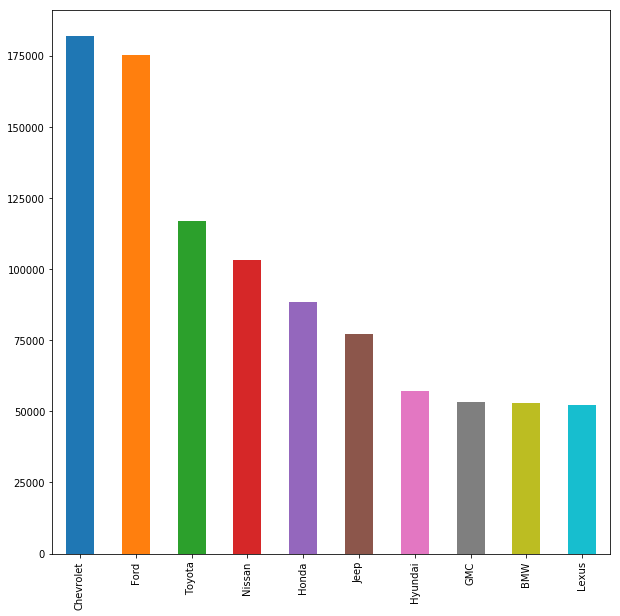

In [36]:
dedups['make_ss'].value_counts().plot(kind='bar', figsize=(10,10))

Newer cars are more expensive than older cars. Expected.

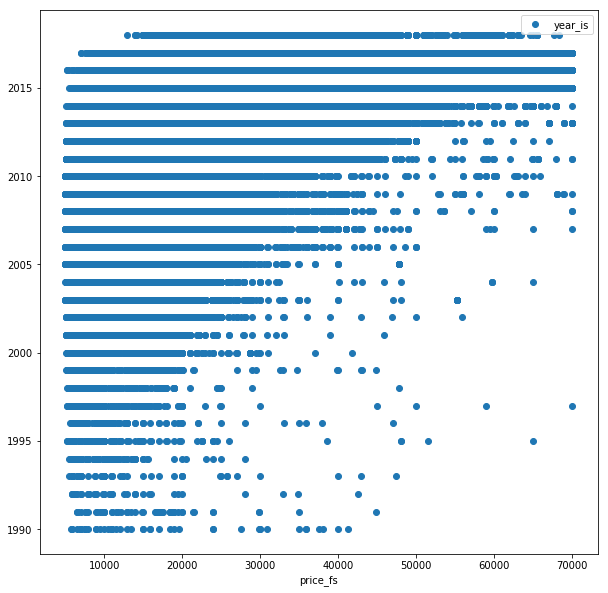

In [37]:
dedups.plot(x='price_fs', y='year_is', style='o', figsize=(10,10))

Range and median prices per car type

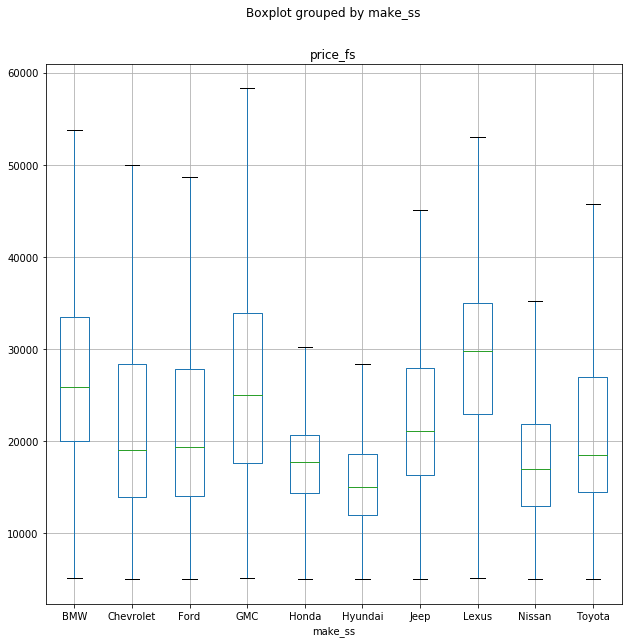

In [38]:
dedups.boxplot(column="price_fs", by="make_ss", figsize=(10,10), showfliers=False)

Distribution among the various categorical features

make_ss
Chevrolet    179123
Ford         171917
Toyota       116722
Nissan       102886
Honda         88498
Name: make_ss, dtype: int64


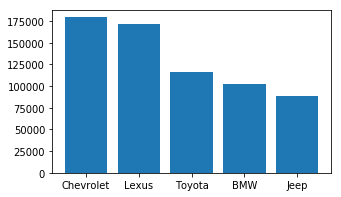

model_ss
F-150             45747
Silverado 1500    45239
Altima            26889
Equinox           26595
CR-V              26493
Name: model_ss, dtype: int64


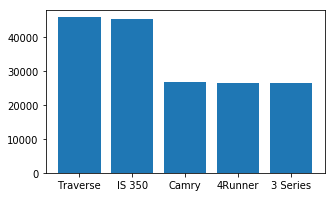

trim_ss
LT         85146
SE         80246
Base       70553
Limited    47780
S          31013
Name: trim_ss, dtype: int64


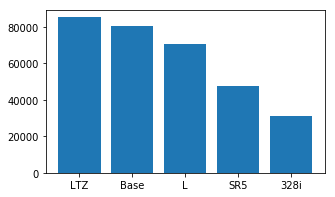

interior_color_ss
Black        110762
BLACK        101017
Jet Black     50269
Gray          38364
GRAY          33221
Name: interior_color_ss, dtype: int64


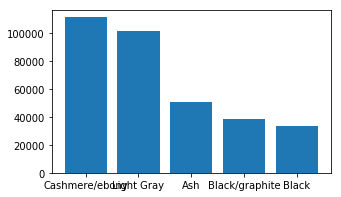

exterior_color_ss
Black           66270
White           32499
Summit White    29410
Silver          22169
Gray            21702
Name: exterior_color_ss, dtype: int64


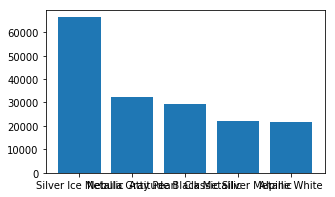

zip
30096    11071
27511    10510
28027    10461
37067     8587
27713     8215
Name: zip, dtype: int64


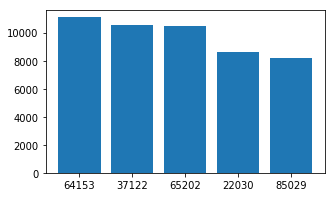

fuel_type_ss
Regular Unleaded    632200
Flex-Fuel           151175
Premium Unleaded    141317
Diesel               16871
Gasoline              3861
Name: fuel_type_ss, dtype: int64


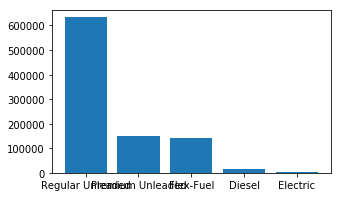

state_ss
NC    107919
FL     71774
TX     69488
CA     66727
GA     50898
Name: state_ss, dtype: int64


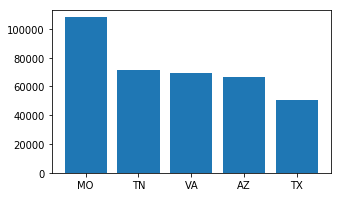

price_fs
15995    4030
16995    3924
17995    3854
19995    3693
14995    3529
Name: price_fs, dtype: int64


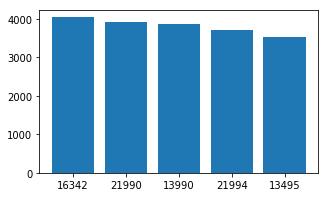

Regions
South        491933
MidWest      225829
West         137723
NorthEast     91185
Name: Regions, dtype: int64


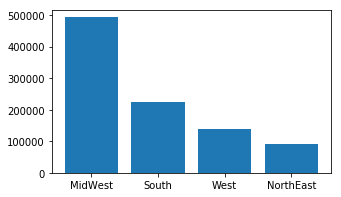

In [35]:
categories = ['make_ss', 'model_ss', 'trim_ss', 'interior_color_ss', 'exterior_color_ss', 'zip', 'fuel_type_ss', 'state_ss', 'price_fs', 'Regions']

for i, c in enumerate(categories):
    v = dedups[c].unique()
    
    g = dedups.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print(g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    plt.xticks(r, v)
    plt.show()

In [25]:
dedups.head()

,price_fs,miles_fs,year_is,make_ss,model_ss,trim_ss,engine_size_ss,cylinders_is,interior_color_ss,exterior_color_ss,zip_is,msrp_fs,is_certified_is,fuel_type_ss,state_ss,AGE,Regions,Population,Median Family income
3,41250,23145,2016,Jeep,Wrangler,Unlimited Rubicon,3.600,6,Black,Black Clearcoat,37067,41250,0,Regular Unleaded,TN,3.000,South,188935.000,"$104,796.00"
5,5999,129614,2005,Jeep,Grand Cherokee,Limited,5.700,8,Khaki,Blue,61244,5999,0,Regular Unleaded,IL,14.000,MidWest,147477.000,"$62,123.00"
6,8979,58858,2014,Ford,Fiesta,SE,1.600,4,CHARCOAL BLACK,Storm Gray,92655,8979,0,Regular Unleaded,CA,5.000,West,3051771.000,"$84,765.00"
7,16477,13705,2016,Chevrolet,Cruze,1LT,1.400,4,Jet Black,Black Metallic,48150,16477,0,Regular Unleaded,MI,3.000,MidWest,1804507.000,"$52,423.00"
8,27500,55574,2015,Chevrolet,Silverado 1500,LT,5.300,8,Cocoa/dune,Black,43125,27500,1,Flex-Fuel,OH,4.000,MidWest,1181824.000,"$64,693.00"


# Feature Engineering

Converting categorical features into numeric values using Scikit Learn

In [26]:
labels = ['make_ss', 'model_ss', 'trim_ss', 'interior_color_ss', 'exterior_color_ss', 'zip_is', 'fuel_type_ss', 'state_ss', 'Regions']
les = {}

for l in labels:
    les[l] = LabelEncoder()
    les[l].fit(dedups[l].astype(str))
    tr = les[l].transform(dedups[l].astype(str))
    
    dedups.loc[:, l + '_feat'] = pd.Series(tr, index=dedups.index)

labeled = dedups[['price_fs'
                        ,'miles_fs'
                        ,'year_is'
                        ,'cylinders_is'
                        ,'msrp_fs'
                        , 'is_certified_is'
                        , 'engine_size_ss'
                        ,'AGE', 'Population'] 
                    + [x+"_feat" for x in labels]]

Used pearson to see how the features are related to each other and more importantly to price so that the top 10 features influencing price can be fed into the model. Looks like state and zip have very little influence on price.

In [27]:
print(labeled.head())

   price_fs  miles_fs  year_is  cylinders_is  msrp_fs  is_certified_is  \
3     41250     23145     2016             6    41250                0   
5      5999    129614     2005             8     5999                0   
6      8979     58858     2014             4     8979                0   
7     16477     13705     2016             4    16477                0   
8     27500     55574     2015             8    27500                1   

   engine_size_ss    AGE  Population  make_ss_feat  model_ss_feat  \
3           3.600  3.000  188935.000             6            320   
5           5.700 14.000  147477.000             6            147   
6           1.600  5.000 3051771.000             2            123   
7           1.400  3.000 1804507.000             1             77   
8           5.300  4.000 1181824.000             1            270   

   trim_ss_feat  interior_color_ss_feat  exterior_color_ss_feat  zip_is_feat  \
3           630                    1816                    1

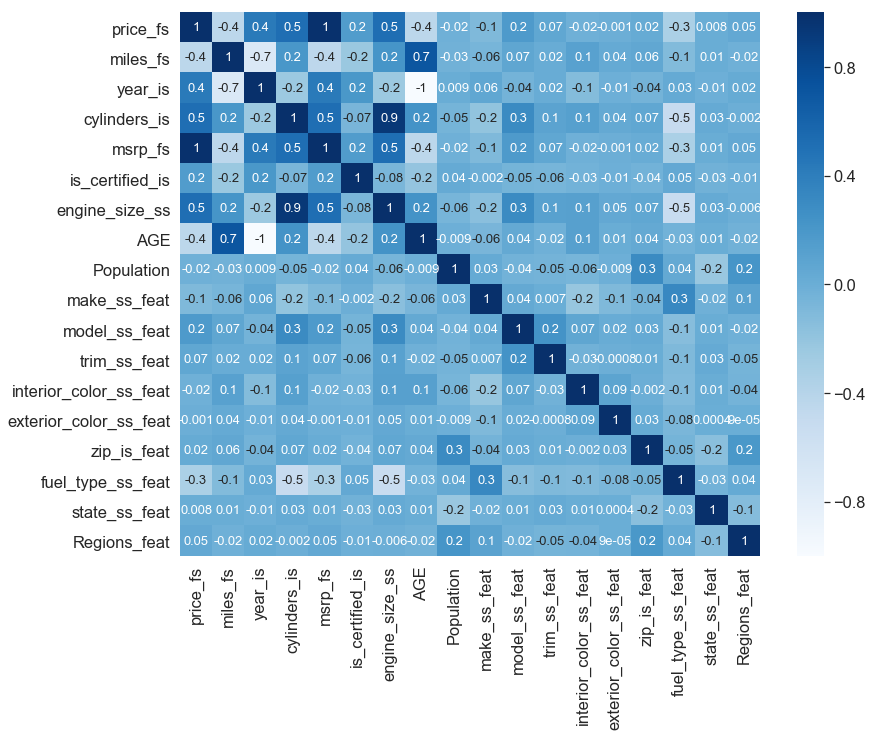

In [28]:
corr = labeled.corr(method='pearson')
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corr, annot = True, fmt =".1g", annot_kws={"size": 13}, cmap = "Blues")

In [58]:
labeled.corr().loc[:,'price_fs'].abs().sort_values(ascending=False)[1:]

msrp_fs                  0.991
engine_size_ss           0.523
cylinders_is             0.522
miles_fs                 0.437
year_is                  0.433
AGE                      0.433
fuel_type_ss_feat        0.330
model_ss_feat            0.178
is_certified_is          0.158
make_ss_feat             0.099
trim_ss_feat             0.066
Regions_feat             0.052
zip_is_feat              0.025
Population               0.020
interior_color_ss_feat   0.017
state_ss_feat            0.008
exterior_color_ss_feat   0.001
Name: price_fs, dtype: float64

### Feature Selection

In [30]:
y = labeled['price_fs']

In [55]:
X = labeled[['miles_fs',
 'cylinders_is',
 'is_certified_is',
 'engine_size_ss',
 'AGE',
 'Population',
 'make_ss_feat',
 'model_ss_feat',
 'trim_ss_feat',
 'interior_color_ss_feat',
 'exterior_color_ss_feat',
 'zip_is_feat',
 'fuel_type_ss_feat',
 'state_ss_feat',
 'Regions_feat']]

In [37]:
features = labeled[['miles_fs',
 'cylinders_is',
 'is_certified_is',
 'engine_size_ss',
 'AGE',
 'Population',
 'make_ss_feat',
 'model_ss_feat',
 'trim_ss_feat',
 'interior_color_ss_feat',
 'exterior_color_ss_feat',
 'zip_is_feat',
 'fuel_type_ss_feat',
 'state_ss_feat',
 'Regions_feat']]

### Lasso (L1 Regularization)

In [39]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
model = Lasso(alpha = 0.001)
model.fit(features, y)
print(list(zip(features, model.coef_.tolist())))

[('miles_fs', -0.08088313535657576), ('cylinders_is', 1763.4913128182036), ('is_certified_is', 1881.4338976430588), ('engine_size_ss', 3140.2083295452794), ('AGE', -1221.6556251784143), ('Population', -7.769954767630348e-05), ('make_ss_feat', -92.17484338759746), ('model_ss_feat', 1.324054784154612), ('trim_ss_feat', -0.5558563794994431), ('interior_color_ss_feat', -0.07410444122506447), ('exterior_color_ss_feat', -0.06368519326879378), ('zip_is_feat', 0.03598577030821182), ('fuel_type_ss_feat', -131.05312713438573), ('state_ss_feat', 0.704662985147166), ('Regions_feat', 434.7234878876828)]


### Ridge Regression (L2 Regularization)

In [40]:
model = Ridge(alpha=0.001)
model.fit(features, y)
print(list(zip(features, model.coef_.tolist())))

[('miles_fs', -0.08088311188172728), ('cylinders_is', 1763.4909280974057), ('is_certified_is', 1881.4429902483448), ('engine_size_ss', 3140.209349929764), ('AGE', -1221.6558115044331), ('Population', -7.769970059593098e-05), ('make_ss_feat', -92.17493085210168), ('model_ss_feat', 1.324053364091068), ('trim_ss_feat', -0.5558557578247946), ('interior_color_ss_feat', -0.07410445483618162), ('exterior_color_ss_feat', -0.06368521823451984), ('zip_is_feat', 0.03598570467442872), ('fuel_type_ss_feat', -131.05328688787435), ('state_ss_feat', 0.7046771676350603), ('Regions_feat', 434.72465887928166)]


### Transformer Methods ( SelectFromModel())

In [41]:
model = Lasso(alpha = 0.001)
sfm = SelectFromModel(model)
sfm.fit(features, y)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['miles_fs', 'cylinders_is', 'is_certified_is', 'engine_size_ss', 'AGE', 'Population', 'make_ss_feat', 'model_ss_feat', 'trim_ss_feat', 'interior_color_ss_feat', 'exterior_color_ss_feat', 'zip_is_feat', 'fuel_type_ss_feat', 'state_ss_feat', 'Regions_feat']


In [42]:
model = Ridge(alpha=0.001)
sfm = SelectFromModel(model)
sfm.fit(features, y)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['cylinders_is', 'is_certified_is', 'engine_size_ss', 'AGE']


In [43]:
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
sfm = SelectFromModel(model)
sfm.fit(features, y.values.ravel())
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['miles_fs', 'cylinders_is', 'engine_size_ss', 'AGE']


### Visualizing Feature Importances

C:\Users\yexin\Anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


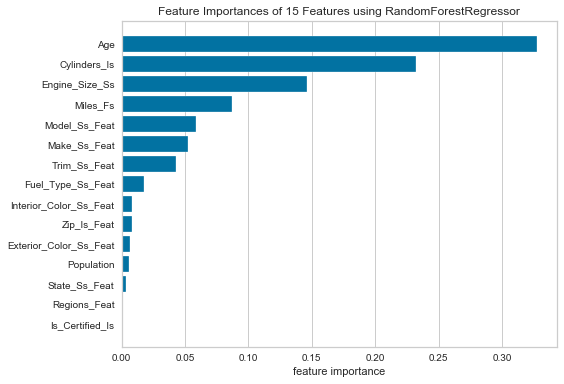

In [57]:
from yellowbrick.features.importances import FeatureImportances
# Create a new figure
fig = plt.figure()
ax = fig.add_subplot()

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(RandomForestRegressor(), ax=ax, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X, y)
viz.poof()

# Model Selection 
Used 15 most influencing features to predict price (80/20 train test split)
Dropped msrp_fs because of 1:1 corelation with price_fs; dropped year_is as it is duplicate with AGE